In [58]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [59]:
time1 = pd.read_csv(r"C:\Users\ramya\Downloads\time_series_with_external_factors.csv")

In [65]:
time1=pd.read_csv("feature_engineered_time_series.csv")
time1['date']=pd.to_datetime(time1['date'])
time1=time1.set_index('date')
time1.head()

,electricity_demand,temperature_celsius,rainfall_mm,is_holiday,lag_1,lag_7,lag_30,rolling_7_mean,rolling_30_mean,day,month,day_of_week,week_of_year,is_weekend
date,,,,,,,,,,,,,,
2019-01-31,429.01,28.88,3.04,0,445.62,430.58,414.34,435.101429,426.843667,31,1,3,5,0
2019-02-01,452.72,33.94,2.47,0,429.01,436.01,399.36,437.488571,428.622333,1,2,4,5,0
2019-02-02,421.28,30.35,6.83,1,452.72,438.60,391.19,435.014286,429.625333,2,2,5,5,1
2019-02-03,443.77,28.41,7.43,1,421.28,411.02,433.55,439.692857,429.966000,3,2,6,5,1
2019-02-04,473.09,32.31,5.02,0,443.77,441.64,428.43,444.185714,431.454667,4,2,0,6,0


In [66]:
time1.head()

,electricity_demand,temperature_celsius,rainfall_mm,is_holiday,lag_1,lag_7,lag_30,rolling_7_mean,rolling_30_mean,day,month,day_of_week,week_of_year,is_weekend
date,,,,,,,,,,,,,,
2019-01-31,429.01,28.88,3.04,0,445.62,430.58,414.34,435.101429,426.843667,31,1,3,5,0
2019-02-01,452.72,33.94,2.47,0,429.01,436.01,399.36,437.488571,428.622333,1,2,4,5,0
2019-02-02,421.28,30.35,6.83,1,452.72,438.60,391.19,435.014286,429.625333,2,2,5,5,1
2019-02-03,443.77,28.41,7.43,1,421.28,411.02,433.55,439.692857,429.966000,3,2,6,5,1
2019-02-04,473.09,32.31,5.02,0,443.77,441.64,428.43,444.185714,431.454667,4,2,0,6,0


In [67]:
# Select Target and Exogenous Variables
target = time1['electricity_demand']

exog_features = [
    'temperature_celsius',
    'rainfall_mm',
    'is_holiday',
    'is_weekend',
    'rolling_7_mean',
    'rolling_30_mean']

exog = time1[exog_features]

In [68]:
# Train-Test Split ( Time Based )
split_date = '2023-01-01'

Y_train = target[target.index < split_date]
Y_test  = target[target.index >= split_date]

exog_train = exog[exog.index < split_date]
exog_test  = exog[exog.index >= split_date]

In [69]:
# To Find Auto ARIMA
from pmdarima import auto_arima
arima = auto_arima(Y_train,seasonal=True,m=7)
print(arima)

 ARIMA(0,1,1)(0,0,2)[7]          


In [70]:
# Build SARIMAX Model
model = SARIMAX(
    Y_train,
    exog=exog_train,
    order=(0, 1, 1),
    seasonal_order=(0, 0, 2, 7),
    enforce_stationarity=False,
    enforce_invertibility=False)

C:\Users\ramya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ramya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [73]:
# Train the Model
sarimax_result = model.fit(disp=False)
sarimax_result.summary()

C:\Users\ramya\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                     electricity_demand   No. Observations:                 1431
Model:             SARIMAX(0, 1, 1)x(0, 0, [1, 2], 7)   Log Likelihood               -5862.040
Date:                                Tue, 24 Feb 2026   AIC                          11744.080
Time:                                        20:31:39   BIC                          11796.622
Sample:                                    01-31-2019   HQIC                         11763.712
                                         - 12-31-2022                                         
Covariance Type:                                  opg                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
temperature_celsius     3.9984      0.185     21.566      0.000       3.635       4.362
rainfall_mm            -1.7969      0.098    -18.298      0.000      -1.989      -1.604
is_holiday              8.1985      0.484     16.932      0.000       7.249       9.147
is_weekend              8.1985      0.484     16.932      0.000       7.249       9.147
rolling_7_mean          0.4719      0.051      9.185      0.000       0.371       0.573
rolling_30_mean        -0.2404      0.047     -5.129      0.000      -0.332      -0.149
ma.L1                  -1.0001      0.064    -15.537      0.000      -1.126      -0.874
ma.S.L7                 0.0348      0.028      1.255      0.209      -0.020       0.089
ma.S.L14                0.0244      0.026      0.926      0.354      -0.027       0.076
sigma2                229.0508     17.061     13.426      0.000     195.612     262.489
===================================================================================
Ljung-Box (L1) (Q):                   6.64   Jarque-Bera (JB):                 0.95
Prob(Q):                              0.01   Prob(JB):                         0.62
Heteroskedasticity (H):               1.09   Skew:                            -0.06
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.89e+20. Standard errors may be unstable.
"""

In [74]:
# Forecast Using External Factors
Y_pred = sarimax_result.predict(start=Y_test.index[0],end=Y_test.index[-1],exog=exog_test)

In [75]:
# Evaluate Model Performance
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print("SARIMAX MAE:", mae)
print("SARIMAX RMSE:", rmse)

SARIMAX MAE: 11.142949407324586
SARIMAX RMSE: 14.165239342241906


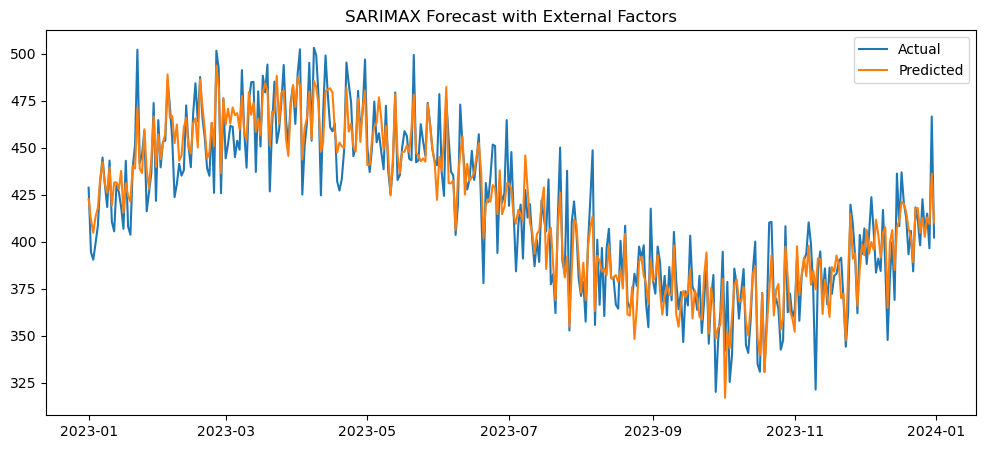

In [76]:
plt.figure(figsize=(12,5))
plt.plot(Y_test.index, Y_test, label='Actual')
plt.plot(Y_test.index, Y_pred, label='Predicted')
plt.title("SARIMAX Forecast with External Factors")
plt.legend()
plt.show()

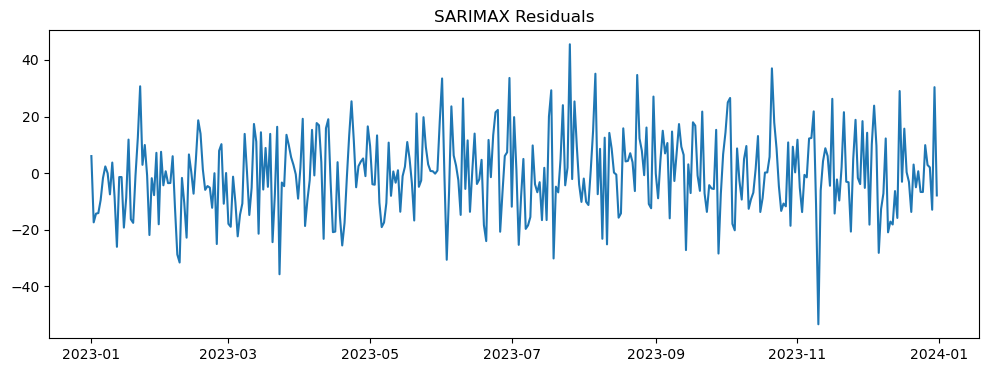

In [77]:
# Residual Analysis
residuals = Y_test - Y_pred
plt.figure(figsize=(12,4))
plt.plot(residuals)
plt.title("SARIMAX Residuals")
plt.show()

In [78]:
# Forecast Future Values 
future_steps = 30
future_exog = exog_test.iloc[:future_steps]
future_forecast = sarimax_result.forecast(
    steps=future_steps,
    exog=future_exog)

future_forecast

2023-01-01    422.650801
2023-01-02    411.746811
2023-01-03    404.655873
2023-01-04    413.334403
2023-01-05    418.048624
2023-01-06    433.807149
2023-01-07    442.343037
2023-01-08    430.487443
2023-01-09    425.899719
2023-01-10    439.349152
2023-01-11    419.185770
2023-01-12    431.473343
2023-01-13    431.457874
2023-01-14    427.869622
2023-01-15    437.582065
2023-01-16    415.431187
2023-01-17    431.125960
2023-01-18    424.297651
2023-01-19    421.209808
2023-01-20    440.400015
2023-01-21    438.886177
2023-01-22    471.399334
2023-01-23    438.833743
2023-01-24    436.464975
2023-01-25    459.726957
2023-01-26    437.980667
2023-01-27    428.208439
2023-01-28    444.159869
2023-01-29    466.507085
2023-01-30    439.715173
Freq: D, Name: predicted_mean, dtype: float64